In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('austin_final.csv')

# df.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'],axis=1)
# df = df.replace('T', 0.0)
# df = df.replace('-',0.0)
# df.to_csv('austin_final.csv')

df

,Unnamed: 0,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,
2,2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,
3,3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,
4,4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0.00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,...,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0.00,
1315,1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,...,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0.00,
1316,1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,...,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0.00,
1317,1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,...,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0.00,


In [29]:
features = ['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 
            'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 
            'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 
            'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles', 
            'WindHighMPH', 'WindAvgMPH', 'WindGustMPH']

target = 'PrecipitationSumInches'


X = df[features].values
y = df[target].values

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

X_normalized = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

day_index = 669
days = [i for i in range(y.size)]

In [24]:
 # Just wanted to test & demonstrate my recent ML theory learnings
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        m = len(y)
        
        for epoch in range(self.epochs):
            y_pred = X.dot(self.theta)
            error = y_pred - y
            cost = (1 / (2 * m)) * np.sum(error ** 2)
            gradient = (1 / m) * X.T.dot(error)
            self.theta -= self.learning_rate * gradient

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Cost: {cost:.4f}')

    def predict(self, X):
        return X.dot(self.theta)

model = LinearRegressionGD(learning_rate=0.01, epochs=1000)
model.fit(X_normalized, y)

y_pred = model.predict(X_normalized)
y_pred[:5]

Epoch 0, Cost: 0.0981
Epoch 100, Cost: 0.0700
Epoch 200, Cost: 0.0674
Epoch 300, Cost: 0.0664
Epoch 400, Cost: 0.0659
Epoch 500, Cost: 0.0656
Epoch 600, Cost: 0.0654
Epoch 700, Cost: 0.0653
Epoch 800, Cost: 0.0652
Epoch 900, Cost: 0.0651


array([ 0.68315227,  0.06099399, -0.23208688, -0.13784885,  0.06056379])

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)

r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.13009263721482367
R-squared: 0.28986647372661445


The precipitation trend graph: 


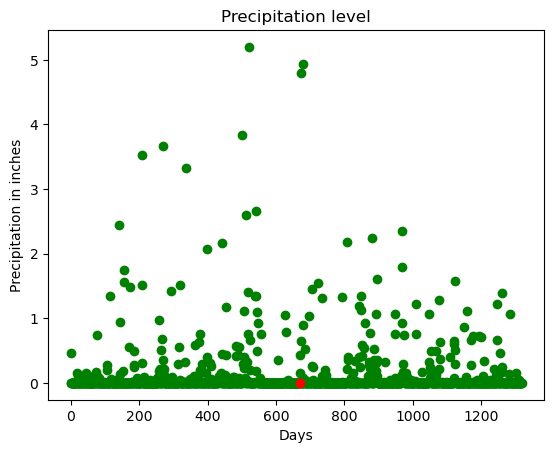

In [14]:
print('The precipitation trend graph: ')
plt.scatter(days, y, color='g')
plt.scatter(days[day_index], y[day_index], color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

plt.show()

Preciptiation Vs Selected Attributes Graph: 


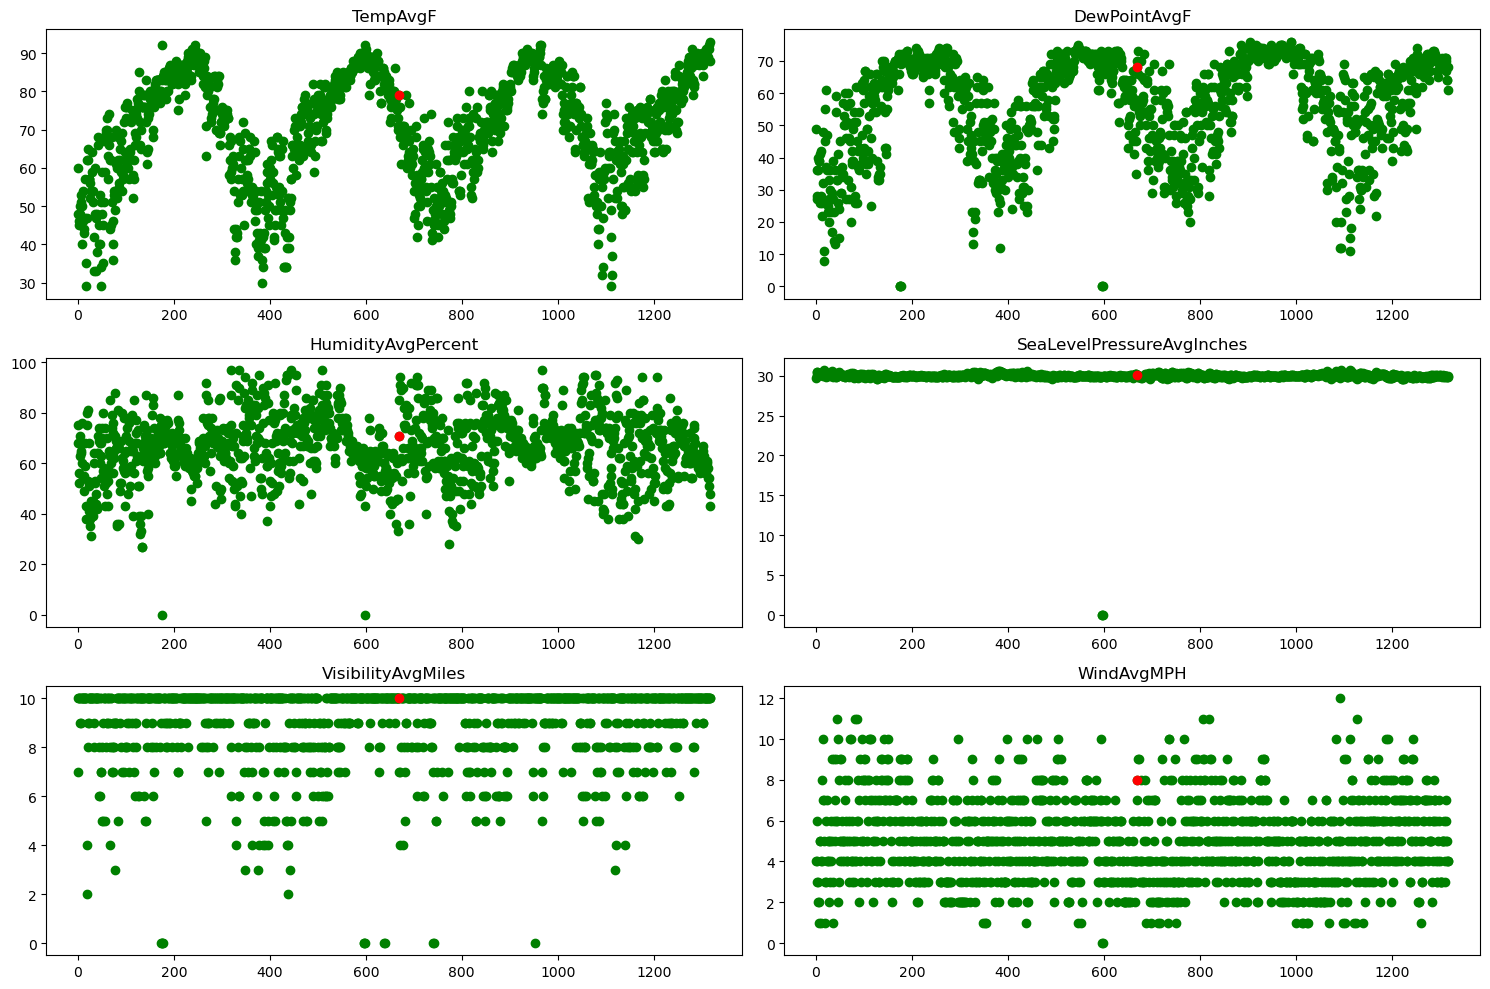

In [15]:
x_f = df[['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
            'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
            'WindAvgMPH']]

print('Preciptiation Vs Selected Attributes Graph: ')
plt.figure(figsize=(15, 10))
for i in range(x_f.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
                [day_index], color='r')
    plt.title(x_f.columns.values[i])

plt.tight_layout()
plt.show()